In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb

# Loading & preprocessing the data

In [6]:
df = pd.read_csv('mushroom_preprocessed.csv')
df

,bruises%3F_b't',gill-attachment_b'f',gill-spacing_b'w',gill-size_b'n',stalk-shape_b't',cap-shape_b'b',cap-shape_b'f',cap-shape_b'k',cap-shape_b'x',cap-surface_b'f',...,population_b'n',population_b's',population_b'v',population_b'y',habitat_b'd',habitat_b'g',habitat_b'l',habitat_b'p',habitat_b'u',class
0,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,b'p'
1,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,b'e'
2,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,b'e'
3,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,b'p'
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,b'e'
8120,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,b'e'
8121,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,b'e'
8122,0,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,b'p'


In [7]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,bruises%3F_b't',gill-attachment_b'f',gill-spacing_b'w',gill-size_b'n',stalk-shape_b't',cap-shape_b'b',cap-shape_b'f',cap-shape_b'k',cap-shape_b'x',cap-surface_b'f',...,population_b'n',population_b's',population_b'v',population_b'y',habitat_b'd',habitat_b'g',habitat_b'l',habitat_b'p',habitat_b'u',class
0,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
le.classes_

array(["b'e'", "b'p'"], dtype=object)

In [9]:
X = df.iloc[:, :-1]
Y = df['class']
X.shape, Y.shape

((8124, 77), (8124,))

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 100)
Xtrain.shape, Xtest.shape

((6093, 77), (2031, 77))

# Model building

In [12]:
#Logistic Regression
lr = LogisticRegression(max_iter = 1000000000)
grid1 = {'solver':['newton-cg', 'lbfgs', 'sag']}

bestLR = GridSearchCV(lr, grid1, cv = 5)
bestLR.fit(Xtrain, Ytrain)
bestLR.best_estimator_

LogisticRegression(max_iter=1000000000, solver='newton-cg')

In [13]:
bestLR.score(Xtest, Ytest)       #We get 100%  testing accuracy using Logistic Regression

1.0

In [15]:
#Random Forest Classifier
rf = RandomForestClassifier()
grid2 = {'max_depth':[5,6,7], 'n_estimators': [10, 50, 100, 150, 200]}

bestRF = GridSearchCV(rf, grid2, cv = 5)
bestRF.fit(Xtrain, Ytrain)
bestRF.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=50)

In [16]:
bestRF.score(Xtest, Ytest)                    #We get 100%  testing accuracy using Random Forest

1.0

In [17]:
Ypred = bestLR.predict(Xtest)

In [18]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



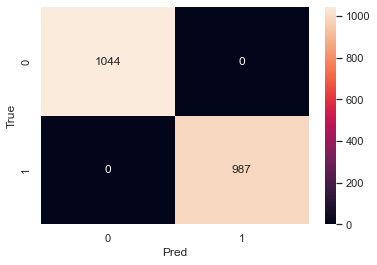

In [19]:
cm = confusion_matrix(Ytest, Ypred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()